In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spopt
from Wavenumbers_components import *
from cvt import *
from cvt_bfgs import *
from wavenumers_bfgs import *
from numerical_test_gradients import *

In [27]:
# Data
x_diffraction_pt = np.array([5000, -3000]) # difraction point
N = 21
start = 0
stop = 10000
# sources and receivers
S = np.array([np.linspace(start = start, stop = stop, num = N, dtype = float), np.zeros(N)]).T # localizations of the sources
R = np.array([np.linspace(start = start, stop = stop, num = N, dtype = float), np.zeros(N)]).T # localizations of the receivers

# reference sources and receivers
shift = np.abs( 0.25*(start - stop)/N )
S_shifted = ( S + np.array([shift, 0]) )  # localizations of the sources
R_shifted = ( R - np.array([shift, 0]) )  # localizations of the receivers

# We compute the maximum angle \phi_max that \phi_s and \phi_r can take; will be useful for 
# later angular and circular arcs formulations of the wavenumber components 
s = np.array([S[0,0], S[1,0]])
ps = x_diffraction_pt - s
ps = ps/np.linalg.norm(ps)
phi_max = np.arccos(np.inner(ps, np.array([0, -1])))
phi_limits = np.array([- phi_max, phi_max])
limits, empty = angles2layout(phi_limits, np.array([]), x_diffraction_pt)

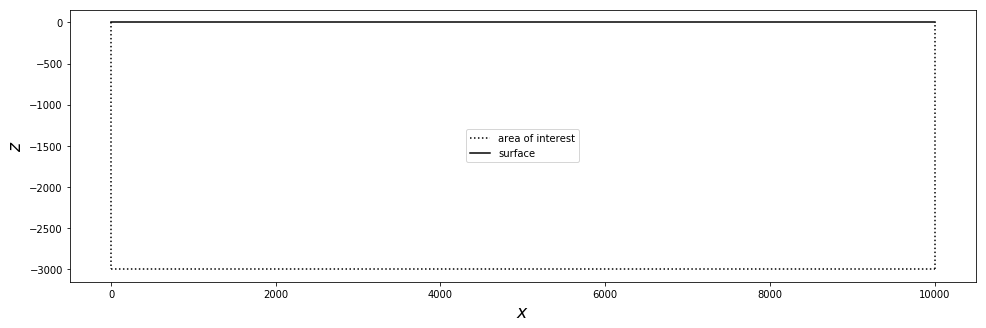

In [36]:
plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.set_aspect('equal', adjustable = 'box')    # aspect ratio is 1
plt.xlabel("$x$", fontsize = 'xx-large')
plt.ylabel("$z$", fontsize ='xx-large')

#ax.scatter(S[:,0], S[:,1], marker = "v", label = "sources")
#ax.scatter(R[:,0], R[:,1], marker = "^", label = "receivers")
ax.plot(S[0,:], np.array([0,-3000]), linestyle = 'dotted', color = 'k', label = "area of interest")
ax.plot(np.array([0,10000]), np.array([-3000,-3000]), linestyle = 'dotted', color = 'k')
ax.plot(np.array([10000,10000]), np.array([-3000,0]), linestyle = 'dotted', color = 'k')
#ax.plot(S[-1], S[0], 'k--')
ax.plot(np.array([0,10000]), np.array([0,0]), color = "k", label = "surface")

plt.legend()
plt.show()

In [30]:
S[-1,:]

array([10000.,     0.])

In [26]:
limits

array([[9285.71428571,    0.        ],
       [ 714.28571429,    0.        ]])

In [1]:
# Plot the disposition of the acquisition installation (location of the sources and receivers)
def plot_disposition2(S, R, x, **kwargs):
    """
    Plot points in the plane
    """ 
    plt.figure(figsize=(20, 5))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable = 'box')    # aspect ratio is 1
    plt.xlabel("$x$", fontsize = 'xx-large')
    plt.ylabel("$z$", fontsize ='xx-large')

    ax.scatter(S[:,0], S[:,1], marker = "v", label = "sources")
    ax.scatter(R[:,0], R[:,1], marker = "^", label = "receivers")
    ax.scatter(x[0], x[1], marker = "X", label = "target point")
    #ax.plot(S[-1], S[0], 'k--')
    if 'limits' in kwargs.keys():
        limits = kwargs['limits']
        ax.scatter(limits[:,0], limits[:,1], marker = "x", color = "r", label = "boundary of the acquisition domain")
    if 'title' in kwargs.keys():
        plt.title(kwargs['title'])
    plt.legend()
    plt.show()

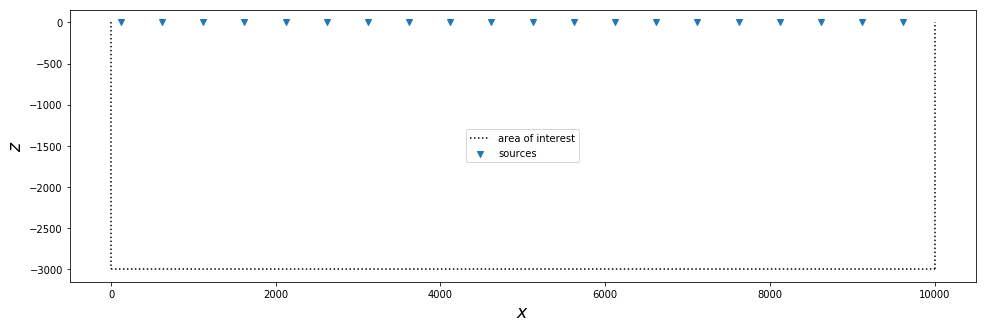

In [40]:
plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.set_aspect('equal', adjustable = 'box')    # aspect ratio is 1
plt.xlabel("$x$", fontsize = 'xx-large')
plt.ylabel("$z$", fontsize ='xx-large')

ax.scatter(S_shifted[:-1,0], S_shifted[:-1,1], marker = "v", label = "sources")
#ax.scatter(R[:,0], R[:,1], marker = "^", label = "receivers")
ax.plot(S[0,:], np.array([0,-3000]), linestyle = 'dotted', color = 'k', label = "area of interest")
ax.plot(np.array([0,10000]), np.array([-3000,-3000]), linestyle = 'dotted', color = 'k')
ax.plot(np.array([10000,10000]), np.array([-3000,0]), linestyle = 'dotted', color = 'k')
#ax.plot(S[-1], S[0], 'k--')

plt.legend()
plt.show()

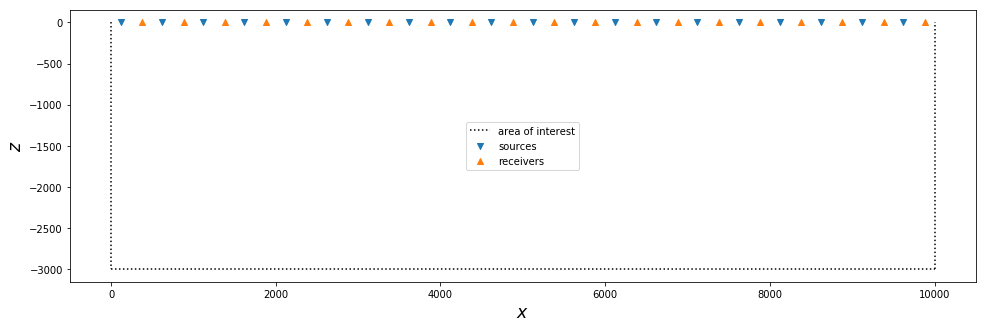

In [43]:
plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.set_aspect('equal', adjustable = 'box')    # aspect ratio is 1
plt.xlabel("$x$", fontsize = 'xx-large')
plt.ylabel("$z$", fontsize ='xx-large')

ax.scatter(S_shifted[:-1,0], S_shifted[:-1,1], marker = "v", label = "sources")
ax.scatter(R_shifted[1:,0], R_shifted[1:,1], marker = "^", label = "receivers")
ax.plot(S[0,:], np.array([0,-3000]), linestyle = 'dotted', color = 'k', label = "area of interest")
ax.plot(np.array([0,10000]), np.array([-3000,-3000]), linestyle = 'dotted', color = 'k')
ax.plot(np.array([10000,10000]), np.array([-3000,0]), linestyle = 'dotted', color = 'k')
#ax.plot(S[-1], S[0], 'k--')

plt.legend()
plt.show()